# Linear Regression

First let's import the neccessary libraries

In [13]:
import numpy as np #python library for numerical functions
import scipy #python library for scientific computing
import random
import pylab
import matplotlib.pyplot as plt #for plotting
import seaborn as sns#for data visulaisation
sns.set(style="white", color_codes=True)

import warnings
import sklearn #python library with linear and other models
from sklearn.cross_validation import train_test_split
# warnings.simplefilter(action = "ignore", category = FutureWarning)
warnings.filterwarnings("ignore")
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

 __Setting up the linear toy problem__

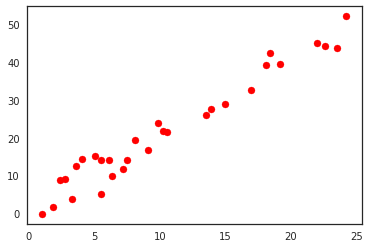

In [80]:
N=30
spanx=25
# np.random.RandomState()
x = np.random.uniform(0,spanx,N)
y = 2*x+1
noise = np.random.normal(0,3.5,N)
y = y + noise
plt.scatter(x,y, color="red")

plt.show()

Cost Function:
---------------
__Mean Squared Error (MSE)__

If $y^{(i)}$ is the actual data point, and $z^{(i)}$ be the predicted value by the model, 
\begin{equation*}
RMSE = \frac{1}{2N}\sum_{i=1}^{N}\big(z^{(i)} - y^{(i)}\big)^2
\end{equation*}

Gradient
---------
For hypothesis $h_{\theta}(x) = \theta_0 + \theta_1x \Rightarrow z^{(i)} =\theta_0 + \theta_1x^{(i)}$

\begin{equation*}
\frac{\partial h}{\partial \theta_0} = \frac{1}{N}\sum_{i=1}^{N}\big(z^{(i)} - y^{(i)}\big)
\end{equation*}

\begin{equation*}
\frac{\partial h}{\partial \theta_1} = \frac{1}{N}\sum_{i=1}^{N}\big(z^{(i)} - y^{(i)}\big).x^{(i)}
\end{equation*}


In [81]:
def sq_err(y,z):
    y_actual=np.array(y)
    y_pred=np.array(z)
    error=(y_actual - y_pred)**2
    error_mean=np.round(0.5*np.mean(error))
    return error_mean

Batch Gradient Descent
-----------------


__alpha__: The learning rate for gradient descent. It is a hyperparameter. Typical values of 0.1 to 0.001

__epochs__: the no. of steps taken

In [82]:
x=np.reshape(x, (N,1))
X = np.column_stack((np.ones(N),x))
X.shape

(30, 2)

In [83]:
# df_x = pd.DataFrame(X)
# df_x

In [84]:
alpha=0.01
total_epoch=5000
theta = np.array([0.1,0.1])
theta = np.reshape(theta, (2,1))
theta.shape
lossHistory=np.zeros([1,total_epoch]).T
t_e=np.zeros([2,total_epoch]).T


for epoch in range(total_epoch):
    h=X@theta
    lossHistory[epoch] = sq_err(y,h)
    del0=0
    del1=0    
    t_e[epoch][0]=theta[0]
    t_e[epoch][1]=theta[1]
    
    for i in range(N):
        del0 = del0 + h[i]-y[i]
        del1 = del1 + (h[i]-y[i])*x[i]
        
    del0 = del0/N
    del1 = del1/N
    grad=np.array([del0, del1])
    theta = theta - alpha*grad


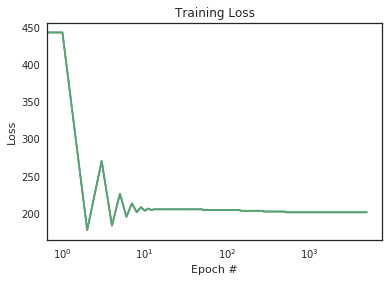

In [85]:
ep = np.linspace(0, total_epoch-1, total_epoch, endpoint=True)
plt.semilogx(ep, lossHistory, lossHistory)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

At epoch epoch_no, 5 theta_0= 0.249592,theta1= 2.216838.
At epoch epoch_no, 0 theta_0= 0.100000,theta1= 0.100000.
At epoch epoch_no, 1 theta_0= 0.216079,theta1= 1.738471.
At epoch epoch_no, 99 theta_0= 0.410762,theta1= 2.021483.
At epoch epoch_no, 999 theta_0= 0.898068,theta1= 1.989516.
At epoch epoch_no, 4999 theta_0= 0.931330,theta1= 1.987334.


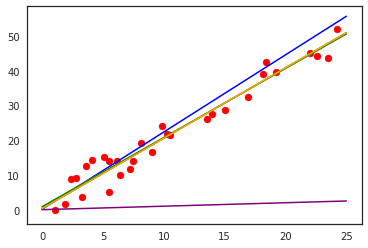

In [86]:
# t_e=np.around(t_e,3)
lx = np.linspace(0, spanx, 256, endpoint=True)

epoch_no=5
S = t_e[epoch_no][0]+t_e[epoch_no][1]*lx
plt.plot(lx, S, color="blue",  linewidth=1.5, linestyle="-")
print("At epoch epoch_no, %d theta_0= %f,theta1= %f." %(epoch_no, t_e[epoch_no][0], t_e[epoch_no][1]) )

S0 = t_e[0][0]+t_e[0][1]*lx
plt.plot(lx, S0, color="purple",  linewidth=1.5, linestyle="-")
print("At epoch epoch_no, %d theta_0= %f,theta1= %f." %(0, t_e[0][0], t_e[0][1]) )

print("At epoch epoch_no, %d theta_0= %f,theta1= %f." %(1, t_e[4][0], t_e[4][1]) )

S99 = t_e[99][0]+t_e[99][1]*lx
plt.plot(lx, S99, color="green",  linewidth=1.5, linestyle="-")
print("At epoch epoch_no, %d theta_0= %f,theta1= %f." %(99, t_e[99][0], t_e[99][1]) )

S999 = t_e[999][0]+t_e[999][1]*lx
plt.plot(lx, S999, color="pink",  linewidth=1.5, linestyle="-")
print("At epoch epoch_no, %d theta_0= %f,theta1= %f." %(999, t_e[999][0], t_e[999][1]) )

S_end = t_e[total_epoch-1][0]+t_e[total_epoch-1][1]*lx
plt.plot(lx, S_end, color="green",  linewidth=1.5, linestyle="-")
print("At epoch epoch_no, %d theta_0= %f,theta1= %f." %(total_epoch-1, t_e[total_epoch-1][0], t_e[total_epoch-1][1]) )

m = 1+ 2*lx
plt.plot(lx, S99, color="orange",  linewidth=1.5, linestyle="-")

plt.scatter(x,y, color="red")
plt.show()

Using Packages to achieve the same
---------------------------------------
__Tensorflow__ is one such package that has inbuilt regressions

In [9]:
import tensorflow as tf
rng = np.random

In [10]:
training_epochs = 1000
display_step=50

#tf Graph Input
A = tf.placeholder("float")
B = tf.placeholer("float")

#Set Model Weights
W = tf.Variable(rng.randn(), name='weight')
b = tf.Variable(rng.randn(), name='bias')

#Construct a linear Model
pred = tf.add(tf.multiply(A,W),b)

#Mean Squared Error
cost = tf.reduce_sum(tf.pow(pred-B, 2))/(2*N)

#Gradient Decent
#By default Variable objects are trainable=True
optimizer = tf.train.GradientDescentOptimizer(alpha).minimize(cost)

#Initialize the variables
init = tf.global_variables_initializer()

#Start Training
with tf.Session as sess:
    
    #Run the initializer
    sess.run(init)
    
    #Fit all training data
    for epoch in range(training epochs):
        for(a,b) in zip(x,y):
            sess.run(optimizer, feed_dict={A: a, B: b})
            
        if(epoch+1)%display_step ==0: #displaying log per display step
            c=sess.run(cost, feed_dict={A: a, B: b})

SyntaxError: invalid syntax (<ipython-input-10-df6a0b70aca7>, line 32)